In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [147]:
given = pd.read_csv("../data/raw/sg-primary-schools.csv")
print(given.shape)
given.head()

(191, 3)


,name,lat,lng
0,Admiralty Primary School,1.442941,103.800345
1,Ahmad Ibrahim Primary School,1.433849,103.832710
2,Ai Tong School,1.360713,103.833018
3,Alexandra Primary School,1.291284,103.824066
4,Anchor Green Primary School,1.390380,103.887354


In [148]:
# higher number of places taken up till phase 2B the better the school
rankings = pd.read_csv("../data/raw/sg-primary-school-ranking.csv")
print(rankings.shape)
rankings.head()

(190, 9)


,Name,Type,GenderMix,Area,Zone,PostalCode,Latitude,Longitude,PlacestakenuptillPhase2B
0,Admiralty Primary School,Government,Mixed,Woodlands,North,738907,1.4427,103.7995,130
1,Ahmad Ibrahim Primary School,Government,Mixed,Yishun,North,768643,1.4333,103.8321,51
2,Ai Tong School,"Government-aided, SAP",Mixed,Bishan,South,579646,1.3603,103.8321,302
3,Alexandra Primary School,Government,Mixed,Bukit Merah,South,159016,1.2913,103.8233,82
4,Anchor Green Primary School,Government,Mixed,Sengkang,North,544969,1.3913,103.8863,101


In [149]:
# find the difference of 1 record. What is that record? How to assign?
df_diff = pd.concat([rankings['Name'],given['name']]).drop_duplicates(keep=False)
df_diff
# conclude only valor needs updating. 
# The rest can merge columns since the indexes are the same i.e. 20 and 20, 144 and 144.

20                Canossa Convent Primary School
144      Singapore Chinese Girls' Primary School
20      Canossa Catholic Primary School1.3263004
144    Singapore Chinese Girls’ School (Primary)
166                        Valour Primary School
dtype: object

In [150]:
rankings.loc[144, 'Name'] = given.loc[144, 'name']
rankings.loc[20, 'Name'] = given.loc[20, 'name']

In [151]:
# should only have valor as difference
# find the difference of 1 record. What is that record? How to assign?
df_diff = pd.concat([rankings['Name'],given['name']]).drop_duplicates(keep=False)
df_diff

166    Valour Primary School
dtype: object

In [152]:
# find valor primary school's location. It is in Punggol.
punggol = rankings['Area'] == 'Punggol'
pg = rankings.loc[punggol]['PlacestakenuptillPhase2B'].mean()

new_row = {"Name": 'Valour Primary School', 
           "Type":'a',
           "GenderMix":'a',
           "Area":'a',
           "Zone": 'a',
           "PostalCode": 1,
           "Latitude": 1,
           "Longitude": 1,
           "PlacestakenuptillPhase2B": pg}

line = pd.DataFrame(new_row, index=[166])
rankings = pd.concat([rankings.iloc[:166], line, rankings.iloc[166:]]).reset_index(drop=True)
rankings.shape



(191, 9)

In [153]:
# should not have any differences
df_diff = pd.concat([rankings['Name'],given['name']]).drop_duplicates(keep=False)
df_diff

Series([], dtype: object)

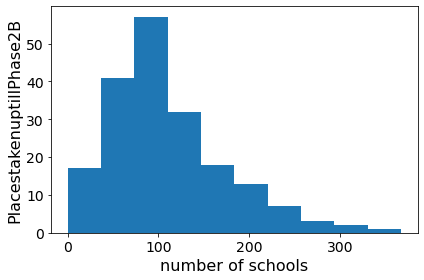

In [154]:
# find distribution of places
plt.figure()
plt.tick_params(labelsize=14)
plt.hist(rankings['PlacestakenuptillPhase2B'].to_numpy(), bins=10)
plt.xlabel('number of schools', fontsize=16)
plt.ylabel('PlacestakenuptillPhase2B', fontsize=16)
plt.tight_layout()
plt.show()

In [219]:
combined = pd.concat([given, rankings["PlacestakenuptillPhase2B"]], axis=1)
combined

col = combined.iloc[:, 3]
combined.iloc[:, 3] = col.apply(lambda x: 1 if x == 0 else x)

combined

,name,lat,lng,PlacestakenuptillPhase2B
0,Admiralty Primary School,1.442941,103.800345,130.0
1,Ahmad Ibrahim Primary School,1.433849,103.832710,51.0
2,Ai Tong School,1.360713,103.833018,302.0
3,Alexandra Primary School,1.291284,103.824066,82.0
4,Anchor Green Primary School,1.390380,103.887354,101.0
...,...,...,...,...
186,Yuhua Primary School,1.342891,103.740960,62.0
187,Yumin Primary School,1.351264,103.950874,77.0
188,Zhangde Primary School,1.284250,103.826082,112.0
189,Zhenghua Primary School,1.379424,103.769676,99.0


In [220]:
combined.to_csv("../data/processed/psch-ranked.csv",index=False)

In [221]:
d = pd.read_csv("../data/processed/psch-ranked.csv")
d.head()
d.shape

(191, 4)

In [222]:
d.sort_values("PlacestakenuptillPhase2B", ascending=False)

,name,lat,lng,PlacestakenuptillPhase2B
102,Nanyang Primary School,1.320832,103.808217,367.0
159,Tao Nan School,1.304929,103.911145,303.0
2,Ai Tong School,1.360713,103.833018,302.0
137,Rosyth School,1.372766,103.874528,269.0
117,Pei Chun Public School,1.337086,103.855680,268.0
...,...,...,...,...
41,Da Qiao Primary School,1.372176,103.859384,1.0
10,Balestier Hill Primary School,1.325701,103.844460,1.0
45,East Coast Primary School,1.329513,103.919902,1.0
47,East View Primary School,1.347099,103.939757,1.0


In [223]:
def haversine_np(lat1, lon1, lat2, lon2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [224]:
def count_n_nearest(df, row):
    length = df.shape[0]
    lat = [row['latitude'] for i in range(length)]
    lng = [row['longitude'] for i in range(length)]
    return haversine_np(list(df['lat']), list(df['lng']), lat, lng)

In [225]:
# train = pd.read_csv('../data/raw/train.csv')

In [226]:
# should take about 10-15mins to run

# overall = []
# for index, row in train[['latitude', 'longitude']].iterrows():
#     overall.append(count_n_nearest(d, row))

In [227]:
# psch_ranked_dist_matrix = pd.DataFrame.from_records(overall)

In [228]:
# psch_ranked_dist_matrix

Priority admission is given in this order:

Singapore Citizens (SC) living within 1km of the school.
SCs living between 1km and 2km of the school.
SCs living outside 2km of the school.
Permanent Residents (PR) living within 1km of the school.
PRs living between 1km and 2km of the school.
PRs living outside 2km of the school.

In [229]:
# save data first

# psch_ranked_dist_matrix.to_csv("../data/processed/psc-ranked-dist-matrix.csv",index=False)

In [265]:
df_dist = pd.read_csv("../data/processed/psc-ranked-dist-matrix.csv")
df_dist

,0,1,2,3,4,5,6,7,8,9,...,181,182,183,184,185,186,187,188,189,190
0,19.415514,15.741957,13.992537,17.271548,8.273857,13.141420,14.633531,14.825547,2.279387,13.257486,...,10.273675,23.271511,8.195928,15.613017,4.807242,24.362708,2.154819,17.486308,21.030716,9.937367
1,12.813880,9.115103,9.254331,15.105264,2.382861,7.462541,12.355896,11.973434,5.298374,8.215457,...,7.035106,17.320469,3.348769,8.984971,7.739407,19.470482,7.205145,15.601854,15.408994,6.002291
2,10.169575,6.813063,5.474751,12.119833,1.520923,3.625395,9.499635,8.850593,7.737696,4.384755,...,4.438852,13.667013,1.737313,6.705258,8.889202,15.599808,9.500947,12.725497,11.611437,3.192775
3,14.325501,14.768147,8.734381,7.053864,15.603691,11.072445,8.350809,7.596253,19.776657,9.837841,...,11.795072,8.890603,14.753710,14.809512,18.539708,3.940715,20.782131,7.615761,6.779043,12.334615
4,12.330038,13.812129,10.135007,11.033014,16.745739,11.689022,11.779324,10.774438,21.869758,10.992387,...,13.976440,5.504623,16.205672,13.888126,21.182749,0.614016,23.134131,11.675564,4.592147,14.175124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431727,1.709541,4.481969,8.881284,15.769600,11.397149,7.394589,14.430209,13.197590,17.837286,8.502372,...,12.323566,5.869044,11.812007,4.609325,18.840616,11.218573,19.624428,16.581522,6.134886,11.553625
431728,10.250286,6.837447,5.776544,12.396708,1.268450,3.885817,9.765705,9.131644,7.588856,4.683561,...,4.662853,13.890826,1.714073,6.726226,8.848001,15.884892,9.374302,12.996792,11.864089,3.420221
431729,18.219287,14.742640,11.391686,13.896212,6.987926,11.099571,11.307194,11.596627,1.656005,10.842621,...,7.382276,21.098880,6.351837,14.624341,1.671360,21.558533,1.787612,14.082462,18.660915,7.340299
431730,12.610769,8.994045,8.192762,13.882219,1.485837,6.616693,11.131607,10.759403,5.155553,7.199447,...,5.812115,16.640853,2.158692,8.869251,7.135441,18.502523,7.036664,14.377126,14.604956,4.796311


In [266]:
for i in range(df_dist.shape[1]):
    col = df_dist.iloc[:, i]
    df_dist.iloc[:, i] = col.apply(lambda x: 3 if x <= 1 else (2 if (x > 1 and x <= 2) else (1 if x <= 4 else 0)))

In [267]:
df_dist

,0,1,2,3,4,5,6,7,8,9,...,181,182,183,184,185,186,187,188,189,190
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,2,1,0,0,0,0,...,0,0,2,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431727,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
431728,0,0,0,0,2,1,0,0,0,0,...,0,0,2,0,0,0,0,0,0,1
431729,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,2,0,2,0,0,0
431730,0,0,0,0,2,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [282]:
df_dist.to_csv("../data/processed/psc-ranked-dist-matrix2.csv",index=False)

In [283]:
df_dist = pd.read_csv("../data/processed/psc-ranked-dist-matrix2.csv")
df_dist

,0,1,2,3,4,5,6,7,8,9,...,181,182,183,184,185,186,187,188,189,190
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,2,1,0,0,0,0,...,0,0,2,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431727,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
431728,0,0,0,0,2,1,0,0,0,0,...,0,0,2,0,0,0,0,0,0,1
431729,0,0,0,0,0,0,0,0,2,0,...,0,0,0,0,2,0,2,0,0,0
431730,0,0,0,0,2,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [279]:
x = np.array(d["PlacestakenuptillPhase2B"] ** 2)
y = df_dist.dot(x)
(y/100000).max()

10.38383

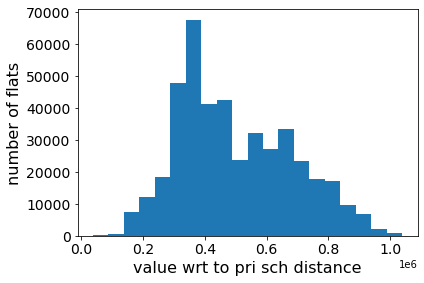

In [281]:
# find distribution of places
plt.figure()
plt.tick_params(labelsize=14)
plt.hist(y.to_numpy(), bins=20)
plt.xlabel('value wrt to pri sch distance', fontsize=16)
plt.ylabel('number of flats', fontsize=16)
plt.tight_layout()
plt.show()